# 1. Метод наискорейшего спуска 

## Метод градиентного спуска

In [2]:
import sympy  
import numpy as np
from sympy import lambdify
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import clear_output, HTML
import time
from matplotlib.ticker import MaxNLocator
import math

In [17]:
def func_for_z(x, y):  # Исходная функция   
    return (x - 5)**2 + (y - 5)** 2 

precision = 0.0001  # Точность обеспечения минимума 
start_tau = 0.001 # Для метода градиентного спуска 
x_cur, y_cur = 25, 20 # Начальные приближения 
min_x, max_x, min_y, max_y = -10, 30, -10, 30

In [18]:
x, y = sympy.symbols('x y')
coords = [x, y]
# Подсчет градиента 
differ = [sympy.diff(func_for_z(x, y), coords[k], 1) for k in range(2)]
in_point_differ = [lambdify(coords, differ[k]) for k in range(2)]

start_time = time.time()  # Начало отсчета работы программы 
coords_cur, z_cur = [x_cur, y_cur], func_for_z(x_cur, y_cur)
all_next_x, all_next_y, all_next_z = [x_cur], [y_cur], [z_cur]
coords_next = [coords_cur[k] - start_tau * in_point_differ[k](coords_cur[0], coords_cur[1]) for k in range(2)]
z_next = func_for_z(coords_next[0], coords_next[1])
while z_cur - z_next > precision:
    all_next_x.append(coords_next[0])  # Собираем данные для графиков 
    all_next_y.append(coords_next[1])
    all_next_z.append(z_next)
    coords_cur, z_cur = coords_next, z_next
    coords_next = [coords_cur[k] - start_tau * in_point_differ[k](coords_cur[0], coords_cur[1]) for k in range(2)]
    z_next = func_for_z(coords_next[0], coords_next[1])

print("Точки минимума по оси x: {} и y: {}, значение в точке: {}".format(all_next_x[-1], all_next_y[-1], all_next_z[-1]))
print("Число итераций:", len(all_next_x))
print("Время работы программы %s секунд " % (time.time() - start_time))

Точки минимума по оси x: 5.126522834075498 и y: 5.094892125556622, значение в точке: 0.02501254303514967
Число итераций: 2530
Время работы программы 0.014308929443359375 секунд 


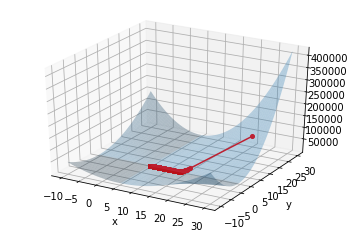

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(min_x, max_x, 10 * start_tau)
Y = np.arange(min_y, max_y, 10 * start_tau)
X, Y = np.meshgrid(X, Y)
Z = np.array([func_for_z(X[i], Y[i]) for i in range(len(X))])
ax.plot_surface(X, Y, Z, alpha=0.3)
ax.plot(all_next_x, all_next_y, all_next_z, c='r', markersize=4, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

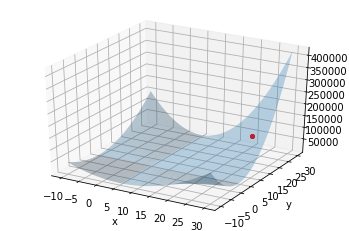

In [6]:
def animate(i, plot):
    plot = ax.plot([all_next_x[i]], [all_next_y[i]], [all_next_z[i]], c='r', markersize=4, marker='o')
    
if len(all_next_x) > 50:  # max число отрисовываемых в анимации точек 
    frames = 50
else:
    frames = len(all_next)    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X, Y, Z, alpha=0.3)
plot = ax.plot([all_next_x[0]],[all_next_y[0]], [all_next_z[0]], c='r', markersize=4, marker='o')
anim = animation.FuncAnimation(fig, animate, fargs=(plot),
                                   interval=100, frames = frames, blit = False)

In [7]:
HTML(anim.to_jshtml())

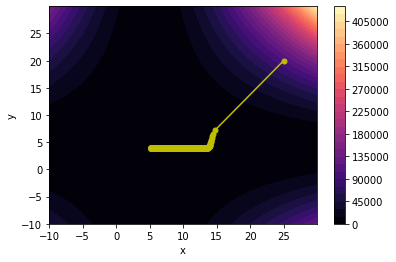

In [8]:
fig, ax = plt.subplots()
levels = MaxNLocator(nbins=30).tick_values(Z.min(), Z.max())
cf = ax.contourf(X, Y, Z, cmap="magma", levels=levels)
fig.colorbar(cf, ax=ax)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(all_next_x,all_next_y, c='y', markersize=5, marker='o')
plt.show()

## Метод наискорейшего спуска

In [19]:
start_time = time.time()  # Начало отсчета работы программы 

def grad(tau, coords_cur):  # Скалярное произведение градиентов  
    grad_cur = [in_point_differ[k](coords_cur[0], coords_cur[1]) for k in range(2)]
    coords_next = [coords_cur[k] - tau * in_point_differ[k](coords_cur[0], coords_cur[1]) for k in range(2)]
    grad_next = [in_point_differ[k](coords_next[0], coords_next[1]) for k in range(2)]
    return np.dot(grad_cur, grad_next)

def find_tau(coords_cur):  # Поиск tau методом деления пополам
    tau_max = 0.001
    # Поиск максимального tau c шагом 1 для ограничения метода деления пополам
    while grad(tau_max, coords_cur) > 0:   
        tau_max += 1
    
    tau = tau_max / 2 
    a, b = 0, tau_max 
    grad_now = grad(tau_max, coords_cur)
    while abs(grad_now) > precision: 
        if grad_now > 0:
            a = tau 
        else: 
            b = tau 
        tau = (b + a) / 2 
        grad_now = grad(tau, coords_cur)
    return tau 

coords_cur, z_cur = [x_cur, y_cur], func_for_z(x_cur, y_cur) 
all_next_x, all_next_y, all_next_z = [x_cur], [y_cur], [z_cur]
tau = find_tau(coords_cur)
coords_next = [coords_cur[k] - tau * in_point_differ[k](coords_cur[0], coords_cur[1]) for k in range(2)]
z_next = func_for_z(coords_next[0], coords_next[1])

while z_cur - z_next > precision:
    all_next_x.append(coords_next[0])
    all_next_y.append(coords_next[1])
    all_next_z.append(z_next)
    coords_cur, z_cur = coords_next, z_next
    tau = find_tau(coords_cur)
    coords_next = [coords_cur[k] - tau * in_point_differ[k](coords_cur[0], coords_cur[1]) for k in range(2)]
    z_next = func_for_z(coords_next[0], coords_next[1])
print("Точки минимума по оси x и y:{}, значение в точке: {}".format(coords_next, z_next))
print("Время работы программы %s секунд " % (time.time() - start_time))

Точки минимума по оси x и y:[5.0000000005435945, 5.000000000407696], значение в точке: 4.617110926375327e-19
Время работы программы 0.004332065582275391 секунд 


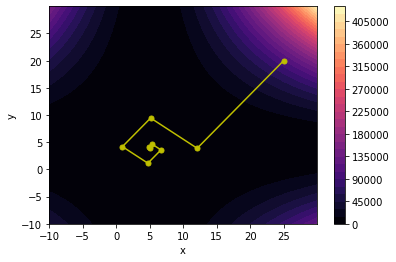

In [10]:
fig, ax = plt.subplots()
levels = MaxNLocator(nbins=30).tick_values(Z.min(), Z.max())
cf = ax.contourf(X, Y, Z, cmap="magma", levels=levels)
fig.colorbar(cf, ax=ax)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(all_next_x,all_next_y, c='y', markersize=5, marker='o')
plt.show()

## Метод с дроблением шага

$$
\begin{cases}
\delta_{n+1} = \gamma  \delta_{n} + \tau  \nabla f(x_n - \gamma \delta_n) \\
x_{n+1} = x_n - \delta_{n+1}
\end{cases}
$$

In [11]:
def grad(coords_cur):
    return [in_point_differ[k](coords_cur[0], coords_cur[1]) for k in range(2)]

tau, gamma = 1, 0.1  # Значения параметров 
delta_step = 0.2
delta_cur = [0.1, 0.1]
coords_cur = [x_cur, y_cur]
delta_next = [0, 0]
start_time = time.time()  # Начало отсчета работы программы 
while func_for_z(coords_cur[0] - tau * grad(coords_cur)[0], \
    coords_cur[1] - tau * grad(coords_cur)[1]) > func_for_z(coords_cur[0],\
    coords_cur[1]) - delta_step * tau * np.linalg.norm(grad(coords_cur)) ** 2:
        tau *= delta_step 
delta_next[0] = gamma * delta_cur[0] + tau * \
    in_point_differ[0](coords_cur[0] - gamma * delta_cur[0], \
        coords_cur[1] - gamma * delta_cur[1]) 
delta_next[1] = gamma * delta_cur[1] + tau * \
    in_point_differ[1](coords_cur[0] - gamma * delta_cur[0], \
        coords_cur[1] - gamma * delta_cur[1]) 
coords_next = [coords_cur[k] - delta_next[k] for k in range(2)]
z_cur = func_for_z(coords_cur[0], coords_cur[1]) 
all_next_x, all_next_y, all_next_z = [x_cur], [y_cur], [z_cur]
z_next = func_for_z(coords_next[0], coords_next[1])
while z_cur - z_next > precision:
    tau *= 1.1
    while z_next > func_for_z(coords_cur[0],\
    coords_cur[1]) - delta_step * tau * np.linalg.norm(grad(coords_cur)) ** 2:
        tau *= delta_step 
    all_next_x.append(coords_next[0])
    all_next_y.append(coords_next[1])
    all_next_z.append(z_next)
    coords_cur = coords_next
    z_cur = z_next
    delta_next[0] = gamma * delta_cur[0] + tau * \
    in_point_differ[0](coords_cur[0] - gamma * delta_cur[0], \
        coords_cur[1] - gamma * delta_cur[1]) 
    delta_next[1] = gamma * delta_cur[1] + tau * \
    in_point_differ[1](coords_cur[0] - gamma * delta_cur[0], \
        coords_cur[1] - gamma * delta_cur[1])
    coords_next = [coords_cur[k] - delta_next[k] for k in range(2)]
    z_next = func_for_z(coords_next[0], coords_next[1])
print("Точки минимума по оси x: {} и y: {}, значение в точке: {}".format(all_next_x[-1], all_next_y[-1], all_next_z[-1]))
print("Число итераций:", len(all_next_x))
print("Время работы программы %s секунд " % (time.time() - start_time))

Точки минимума по оси x: 4.992045501384008 и y: 3.9910412368612143, значение в точке: 1.0001435385635482
Число итераций: 57
Время работы программы 0.004464864730834961 секунд 


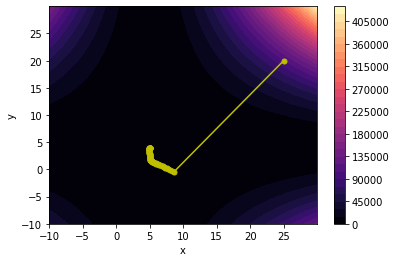

In [129]:
fig, ax = plt.subplots()
levels = MaxNLocator(nbins=30).tick_values(Z.min(), Z.max())
cf = ax.contourf(X, Y, Z, cmap="magma", levels=levels)
fig.colorbar(cf, ax=ax)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(all_next_x,all_next_y, c='y', markersize=5, marker='o')
plt.show()

## Оценочная последовательность 

In [16]:
tau, gamma =  2, 1.1
X = np.arange(min_x, max_x, start_tau * 1000)
Y = np.arange(min_y, max_y, start_tau * 1000)
def make_step(coords_cur, L, A, full_sum):
    while True:
        z_cur, grad_cur = func_for_z(coords_cur[0], coords_cur[1]), grad(coords_cur) 
        a = (1 + math.sqrt(1 + 2 * L * A)) / L
        xy = np.meshgrid(X, Y)
        sum_count = lambda k, j: full_sum[k][j] + a * (z_cur + np.dot(grad_cur, [xy[0][k][j] - coords_cur[0], xy[1][k][j] - coords_cur[1]]))
        new_sum = [[sum_count(k, j) for k in range(np.shape(xy)[1])] for j in range(np.shape(xy)[2])]
        psi = lambda k, j: np.linalg.norm([xy[0][k][j] - x_cur, xy[1][k][j] - y_cur]) ** 2 + full_sum[k][j] + \
        a * (z_cur + np.dot(grad_cur, [xy[0][k][j] - coords_cur[0], xy[1][k][j] - coords_cur[1]]))
        all_psi = np.array([[psi(k, j) for k in range(np.shape(xy)[1])] for j in range(np.shape(xy)[2])])
        v_ind = np.unravel_index(all_psi.argmin(), all_psi.shape)
        v = [X[v_ind[0]], Y[v_ind[1]]]
        y = [(A * coords_cur[0] + a * v[0]) / (A + a), (A * coords_cur[1] + a * v[1]) / (A + a)] 
        func_T = lambda k, j: func_for_z(y[0], y[1]) + np.dot(grad(y), xy[0][k][j] - xy[1][k][j]) +\
            L / 2 * np.linalg.norm([xy[0][k][j] - x_cur, xy[1][k][j] - y_cur]) ** 2 
        all_func_T =  np.array([[func_T(k, j) for k in range(np.shape(xy)[1])] for j in range(np.shape(xy)[2])])
        T_ind = np.unravel_index(all_func_T.argmin(), all_func_T.shape)
        T = [X[T_ind[0]], Y[T_ind[1]]]
        g = [L * (y[0] - T[0]) - grad(y)[0] + grad(T)[0], L * (y[1] - T[1]) - grad(y)[1] + grad(T)[1]]
        if np.dot(g, [y[0] - T[0], y[1] - T[1]]) < 1 / L * np.linalg.norm(g) ** 2:
            L *= tau 
        if np.dot(g, [y[0] - T[0], y[1] - T[1]]) >= 1 / L * np.linalg.norm(g) ** 2:
            break
    return new_sum, g, y, T, L, a

start_time = time.time()  # Начало отсчета работы программы 
coords_cur, L, A, full_sum = [x_cur, y_cur], 0.00001, 0, np.zeros((len(X), len(Y)))
all_next_x, all_next_y, all_next_z = [x_cur], [y_cur], [z_cur]
z_cur = func_for_z(coords_cur[0], coords_cur[1])

while True:  
    full_sum, g, y, T, L, a = make_step(coords_cur, L, A, full_sum)
    coords_cur, A, L = T, A + a, max(0.00001, L / gamma)
    z_next = func_for_z(coords_cur[0], coords_cur[1])
    all_next_x.append(coords_cur[0])
    all_next_y.append(coords_cur[1])
    all_next_z.append(z_next)
    if z_next - z_cur > precision:
        break 
    else:
        z_cur = z_next
print("Точки минимума по оси x: {} и y: {}, значение в точке: {}".format(all_next_x[-1], all_next_y[-1], z_next))
print("Число итераций:", len(all_next_x))
print("Время работы программы %s секунд " % (time.time() - start_time))

Точки минимума по оси x: 25.0 и y: 20.0, значение в точке: 103057.0
Число итераций: 3
Время работы программы 3.396366834640503 секунд 
